# PROJECT STARTS HERE

# Importing Libraries and Modules

In [1]:
import sklearn
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
# import mediapipe as mp
# import csv
# import dill
import pandas as pd

C:\Users\dr2007\AppData\Local\Temp\ipykernel_6052\2279094380.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import pandas as pd
# !pip3 install --upgrade pandas

C:\Users\dr2007\AppData\Local\Temp\ipykernel_17560\2537256825.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Tue Feb 20 16:47:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  | 00000000:01:00.0  On |                  N/A |
| 25%   32C    P8              21W / 215W |    449MiB /  8192MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
# !pip3 install opencv-python
# !pip3 install dill
# !pip3 install matplotlib
# !pip3 install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.6 MB 33.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 46.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 56.4 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 65.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 59.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00


In [ ]:
# To save variable of the last session (avoid re-executing the cells)
# dill.dump_session('base_variables3.db')

In [ ]:
# To load session variables
# dill.load_session('base_variables3.db')

In [ ]:
# !unzip '/content/drive/MyDrive/NEW_MP_Frames.zip' > /dev/null

# Frame Extraction

In [ ]:
# Folder path of dataset
folder_path = r'D:\FYP_HWU\Videos'
DATA_PATH = r'D:\FYP_HWU'

In [ ]:
# List of actions to train model with (11 classes or actions)
actions = [
'accident',
'call',
'help',
'man',
'murder',
'woman',
'danger',
'police',
'follow',
'child',
'sick'
]


In [ ]:
temp_actions = ['follow', 'child','police']

In [ ]:
len(temp_actions)

3

### Counting number of videos under each action in the dataset

In [ ]:
# folder_path = r'C:\Users\dr2007\Documents\FYP_HWU\Aug_Frames'
folder_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'

In [ ]:
# Initializing variables
video_count = {}
folder_path = r'D:\FYP_HWU\NEW_Frames'

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        if (i in actions): #if the keyword is present in the shortlisted list of actions
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                video_count[i] = len(dirs)
                break
    break

print(video_count)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'follow': 9, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


In [ ]:
# Initializing variables
video_count = {}
first_11_items = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        for root, dirs, files in os.walk(os.path.join(folder_path, i)):
            video_count[i] = len(files)
            break

    break


In [ ]:
video_count1 = sorted(video_count.items(), key=lambda x:x[1], reverse = True)

In [ ]:
for idx, k in enumerate(video_count1):
    if idx == 11: break
    first_11_items[k[0]] = k[1]

print(first_11_items)
# print(video_count)

{'cousin': 17, 'before': 16, 'cool': 16, 'thin': 16, 'drink': 15, 'go': 15, 'computer': 14, 'help': 14, 'inform': 14, 'take': 14, 'who': 14}


In [ ]:
# print(video_count1)

In [ ]:
# video_count = {'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}

In [ ]:
temp_video_count = {'follow': 36, 'child': 36, 'police': 40}

In [ ]:
len(temp_video_count)

3

### Getting the video paths of the videos

In [ ]:
video_paths = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):

    for action in actions:
        for root, dirs, files in os.walk(os.path.join(folder_path, action)):
            for i in range (len(files)):
                files[i] = os.path.join(folder_path, action, files[i])
            video_paths[action] = files
            break
    break

# print(video_paths)

In [ ]:
# converting the folderpaths to csv file
df = pd.DataFrame.from_dict(video_paths, orient='index')
df = df.transpose()
df.to_csv('video_paths.csv', index=False)

In [ ]:
# Reading a csv file to get the video paths
def read_csv_to_dict(csv_file):
    result_dict = {}

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)

        # Read the header row to get the keys
        keys = next(csv_reader, None)
        if keys:
            for key in keys:
                result_dict[key] = []

            # Read the rest of the rows and store values in the dictionary
            for row in csv_reader:
                for i in range(len(keys)):
                    result_dict[keys[i]].append(row[i])

    return result_dict

In [ ]:
video_paths = read_csv_to_dict("video_paths.csv")

In [ ]:
print(temp_video_path)

In [ ]:
# print(video_paths)

### Creating folders to store frames

In [ ]:
#Creating folder 'Frames' that will contain all the video frames
# os.makedirs(os.makedirs(os.path.join(DATA_PATH,'Frames')))
# os.makedirs(os.path.join(DATA_PATH,'Original_Frames'))

In [ ]:
#Creating folder 'NEW_Frames' that will contain all the video frames
DATA_PATH = r'D:\FYP_HWU'
os.makedirs(os.path.join(DATA_PATH,'NEW_Frames'))

In [ ]:
#Creating one folder for each action
for action in video_paths.keys():
    # 1 folder for each video of the action
    for sequence in range(len(video_paths[action])):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Extracting frames from videos and adding them to folders

### APPROACH 1
Here, a fixed number of frames are extracted from each video (60 in the current case). If the extracted frames from a video are less than 60, then the last frame is repeated to reach the 60 count. If the video is too long, then then the first 60 frames of the video will be extracted.

In [ ]:
#looping through each action
for action in video_paths.keys():

    #Looping through each video of the action
    for sequence in range(len(video_paths[action])):

        # Open the video file
        cap = cv2.VideoCapture(video_paths[action][sequence])

        # Initializing variables
        frame_count = 0       # current frame count
        max_fc = 60          # maximum frame count


        #while the video is accessible and the current frame count doesn't exceed the max frame count limit
        while (cap.isOpened() and frame_count < max_fc):
            #reading the video frame
            success, frame = cap.read()

            #if there are frames
            if success:
                image = frame.copy()
                cv2.imshow("{} - {}".format(action, sequence), image)

                #saving the extracted frames (in jpg format)
                cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
                frame_count+=1
            else:
                break

        # repeat last frame until we reach max frame count
        while frame_count < max_fc:
            cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
            frame_count+=1

        cap.release()
        cv2.destroyAllWindows()

### APPROACH 2
Here too, a fixed number of frames are extracted from each video (20 in the current case). The frames will be extracted after dividing the complete video into equal parts and then choosing the frames from each part. This way we will be able to avoid the first few or last frames few of the video if no action is being depicted. Secondly, the basic movement of the action is captured.

In [ ]:
# how many frames to extract?
count = []
for action in video_paths.keys():
        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])
            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            count.append(total_frames)
            cap.release()

In [ ]:
print(min(count))

25.0


In [ ]:
print(max(count))

155.0


In [ ]:
# tcount = []
# cap = cv2.VideoCapture(video_paths['accident'][0])
# total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# tcount.append(total_frames)
# cap.release()

In [ ]:
# print(tcount)

In [ ]:
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'

In [ ]:
def frameSkipping(video_paths, n):
    for action in video_paths.keys():

        #Looping through each video of the action
        for sequence in range(len(video_paths[action])): #len(video_paths[action])
            cap = cv2.VideoCapture(video_paths[action][sequence])

            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  #getting the total frame count
            frames_step = total_frames//n    # getting the number of frames to skip

            for frame_num in range(n):
                #here, we set the parameter 1 which is the frame number to the frame (i*frames_step)
                cap.set(1,frame_num*frames_step)
                success,image = cap.read()
                #save your image
                cv2.imwrite(os.path.join(DATA_PATH, action, str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

            cap.release()


In [ ]:
frameSkipping(video_paths, 20)

# Data Preprocessing

By the end of this section, we will folders containing the images frames stored in jpg format for each video of each action.

## Data Augmentation
 Using:
 - Frame Mirroring (Flipping the image horizontally)
 - Changing contrast, brightness and saturation levels
 - Rotating

 Here, we take each video, extract frames and for each frame, apply the filters (which may wither include changing the contrast and brightness of the image frame, mirroring the image or extracting only the keypoints and the edges from the image), and store them as a separate video.


In [ ]:
from PIL import Image, ImageEnhance

In [ ]:
def blackAndWhite(image): # takes image as a parameter
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(0)

    # return np.array(new_image)
    return new_image

In [ ]:
def saturation(image): # takes image as a parameter
    # Horizontally flipping the image
    image = flipImage(image)
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(1.5)

    # return np.array(new_image)
    return new_image

In [ ]:
def flipImage(image): # takes image as a parameter
    # Converting Image to numpy array
    new_image = np.array(image)

    # Horizontally flipping the image
    image = cv2.flip(new_image, 1)

    # Converting numpy aray to image format
    image = Image.fromarray(image.astype('uint8'))

    # Returning the image in image format
    return image

In [ ]:
def rotateImage(image):
    image  = image.rotate(-8)  #- or + -> left or right
    return image

In [ ]:
# NEW_PATH = r'D:\FYP_HWU\New folder'
# resize = (224,224)

# for frame_num in range (20):
#     IMAGE_PATH = os.path.join(DATA_PATH, 'child', '7' , 'frame' + str(frame_num) + '.jpg')

#     # Reading the image
#     image = cv2.imread(IMAGE_PATH)

#     # Resizing the Image
#     new_image = resizeFrames(image, resize)

#     #Converting numpy array to Image
#     image = Image.fromarray(new_image.astype('uint8'))

#     # Applying the filters
#     new_image = rotateImage(image)

#     # Converting Image to numpy array
#     new_image = np.array(new_image)

#     #Saving the image in the folder created
#     cv2.imwrite(os.path.join(NEW_PATH , 'frame'+ str(frame_num) + '.jpg'), new_image)

#     # Displaying Image
#     cv2.destroyAllWindows()

In [ ]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [ ]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [ ]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [ ]:
# PATH = r'D:\FYP_HWU\Resized_Frames'
# videoCount = totalVideoCount(PATH)
# print(videoCount)

In [ ]:
# IMAGE_PATH = os.path.join(DATA_PATH,'accident', '6', 'frame' + '11' +'.jpg')
# print(IMAGE_PATH)

In [ ]:
# resize = (224,224)
# img = cv2.imread(IMAGE_PATH)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # transposed  = img.rotate(-10)
# # new_image = np.array(transposed)
# new_image = crop_center_square(img)
# new_image = cv2.resize(new_image, resize)
# image = Image.fromarray(new_image.astype('uint8'))
# new_image = rotateImage(image)
# new_image.show()
# # image.show()
# cv2.destroyAllWindows()

In [ ]:
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'
VideoCount = totalVideoCount(DATA_PATH)
print(VideoCount)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'follow': 9, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


In [ ]:
# max_fc = 20 (maximum number of frames extracted per video), variable already initialized earlier

# loop through each video (sequence) for each action
# create another sequece folder (my_dict[action] + count), where count is incremented with every sequence loop iteration
# for loop for i in range(20):
# get the image -> concat('frame', str(i))
# apply filters
# save the image in the new folder created

max_fc = 20
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'

finalVideoCount = totalVideoCount(AUG_PATH)
video_count = totalVideoCount(DATA_PATH)

#looping through each action
for action in video_count.keys():
    actionCount = finalVideoCount[action]

    #Looping through the count for videos for that action
    for sequence in range(video_count[action]):

        #creating a folder to store the augmented images
        folder_number = actionCount + sequence
        if(folder_number < 45):
            try:
                os.makedirs(os.path.join(AUG_PATH, action, str(folder_number)))
            except:
                pass

            for frame_num in range (max_fc):
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Resizing the Image
#                 new_image = resizeFrames(image, resize)

                #Converting numpy array to Image
                image = Image.fromarray(image.astype('uint8'))

                # Applying the filters
#                 new_image = blackAndWhite(image)
#                 new_image = flipImage(image)
#                 new_image = saturation(image)
                new_image = rotateImage(image)

                # Converting Image to numpy array
                new_image = np.array(new_image)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(AUG_PATH , str(action), str(folder_number), 'frame'+ str(frame_num) + '.jpg'), new_image)

                # Displaying Image
                cv2.destroyAllWindows()

        else:
            break


In [ ]:
finalVideoCount = totalVideoCount(AUG_PATH)
print(finalVideoCount)

{'accident': 45, 'call': 45, 'child': 45, 'danger': 45, 'follow': 45, 'help': 45, 'man': 45, 'murder': 45, 'police': 45, 'sick': 45, 'woman': 45}


## Resizing Images

Resizing the images to 224 x 224 pixel size to feed to ResNet 50 pre trained model.

In [ ]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [ ]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [ ]:
max_fc = 20
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'

videoCount = totalVideoCount(DATA_PATH) #getting a video count from original frame dataset

#looping through each action
for action in videoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(videoCount[action]):

        #creating a folder in AUG frames folder
        try:
            os.makedirs(os.path.join(AUG_PATH, action, str(sequence)))
        except:
            pass

        # iterating through each frame in the original frame dataset
        for frame_num in range (max_fc):
            IMAGE_PATH = os.path.join(DATA_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

            # Reading the image
            image = cv2.imread(IMAGE_PATH)

            new_image = resizeFrames(image, resize)

            #Saving the image in the folder created
            cv2.imwrite(os.path.join(AUG_PATH, str(action), str(sequence), 'frame' + str(frame_num) + '.jpg'), new_image)

            # Displaying Image
            cv2.destroyAllWindows()


## Keypoint Extraction using MediaPipe Holistics
Applying MediaPipe Keypoint Landmarks to the extracted frames

In [ ]:
mp_holistic = mp.solutions.holistic #Holistic model (use for detections)
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius=1)

In [ ]:
# # max_fc = 20
# AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames\accident\0\frame12.jpg'

# # Reading the image
# image = cv2.imread(AUG_PATH)

# # Making detection
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#     image, result = mediapipeHolistics(image, holistic)

# #Darwing landmarks on frames
# draw_landmarks(image,result)

# image = Image.fromarray(image.astype('uint8'))
# image.show()
# # Displaying Image
# cv2.destroyAllWindows()


In [ ]:
#Capturing landmarks
def mediapipeHolistics(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion -> BGR to RGB
    image.flags.writeable = False
    results = model.process(image) # Making Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion -> RGB to BGR
    return image, results

In [ ]:
#Visualize landmarks, connecting the landmarks on the image (drawing only pose and had landmarks)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.pose_landmarks,
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.left_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.right_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)

In [ ]:
max_fc = 20
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
FRAMES_PATH = r'D:\FYP_HWU\NEW_MP_Frames'

finalVideoCount = totalVideoCount(AUG_PATH)

#looping through each action
for action in finalVideoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):

        # Creating folders to store frames and extracted landmarks
        try:
            os.makedirs(os.path.join(FRAMES_PATH, action, str(sequence)))
        except:
            pass

        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            for frame_num in range (max_fc):

                # Getting the extracted frame from the folder
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Making detection
                image, result = mediapipeHolistics(image, holistic)

                #Darwing landmarks on frames
                draw_landmarks(image,result)

#                 image = Image.fromarray(image.astype('uint8'))

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

                # Displaying Image
                cv2.destroyAllWindows()


# Creating the Dataset

### Visualizing dataset frames

In [ ]:
from PIL import Image, ImageEnhance
from IPython.display import Image
DATA_PATH = r'NEW_MP_Frames'

ACTION: Man    Video: 0     Frame: 22


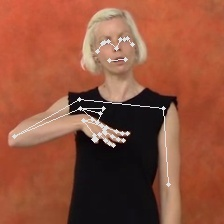

In [ ]:
# man (video 0, frame 22)
print("ACTION: Man    Video: 0     Frame: 22")
display(Image(filename="{}/man/0/frame15.jpg". format(DATA_PATH)))

## Creating Labels and Features

In [4]:
# !pip3 install tensorflow --user

In [5]:
# !pip3 uninstall numpy==1.20.1
# !pip3 install numpy==1.23.5 --user
# import tensorflow as tf

   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
    --------------------------------------- 0.3/14.7 MB 9.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/14.7 MB 11.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/14.7 MB 11.0 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/14.7 MB 11.0 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/14.7 MB 11.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/14.7 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.7 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/14.7 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/14.7 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/14.7 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.0/14.7 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/14.7 MB 6.3 MB/s eta 0:00:02
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires clang~=5.0, which is not installed.
tensorboard 2.6.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.22.0 which is incompatible.
tensorflow 2.6.0 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tensorflow 2.6.0 requires flatbuffers~=1.12, but you have flatbuffers 20210226132247 which is incompatible.


In [2]:
import numpy as np 
np.__version__  #'1.23.5'

'1.23.5'

In [4]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [47]:
# # Splitting data in 80:10:10 train:validation:test ratio
# def trainTestSplit(X,y):
#     x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.2, random_state=42)
#     x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)
#     return x_train, y_train, x_val, y_val, x_test, y_test

In [4]:
def trainTestSplit(X,y):
    x_train, x_val, y_train, y_val= train_test_split(X, y, test_size=0.05, random_state=42)
    return x_train, y_train, x_val, y_val

In [5]:
# DATA_PATH = r'NEW_MP_Frames'
# DATA_PATH = r'D:\FYP_HWU\NEW_MP_Frames'
DATA_PATH = r'C:\Users\dr2007\Documents\FYP_DATA\NEW_MP_Frames'

In [6]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [7]:
# Creating subset to to test whether the model works fine
total_video_count = totalVideoCount(DATA_PATH)
temp_list = ['police', 'follow', 'child', 'woman']
subset_video_count = {}
for temp in temp_list:
    subset_video_count[temp] = total_video_count[temp]

print(subset_video_count)

{'police': 45, 'follow': 45, 'child': 45, 'woman': 45}


In [13]:
# total_video_count = totalVideoCount(DATA_PATH)
print(total_video_count)

{'accident': 45, 'call': 45, 'child': 45, 'danger': 45, 'follow': 45, 'help': 45, 'man': 45, 'murder': 45, 'police': 45, 'sick': 45, 'woman': 45}


In [46]:
print(total_video_count)

{'accident': 45, 'call': 45, 'child': 45, 'danger': 45, 'follow': 45, 'help': 45, 'man': 45, 'murder': 45, 'police': 45, 'sick': 45, 'woman': 45}


In [ ]:
# subset_video_count = {'police': 40, 'follow': 36}

In [8]:
# Setting numeric labels for non numeric action category values
# label_map = {label:num for num, label in enumerate(total_video_count.keys())} # all classes
label_map = {label:num for num, label in enumerate(subset_video_count.keys())} #subset of classes

In [9]:
print(label_map)

{'police': 0, 'follow': 1, 'child': 2, 'woman': 3}


### Preparing Data with 'Mediapipe Landmarks' stored as numpy arrays

In [ ]:
# SUBSET CLASSES

#features = non target columns    labels = target columns

max_fc = 20
features, labels = [], []

# Iterating through each action
for action in subset_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):

            # Declaring directory of the keypoints
            IMAGE_PATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))

            # Loading the numpy array
            res = np.load(IMAGE_PATH)

            # Appending to the list
            frames.append(res)

        # Adding to the dataset
        features.append(frames)
        labels.append(label_map[action])

In [ ]:
# ALL CLASSES

max_fc = 20
features, labels = [], []
# Iterating through each action
for action in subset_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):

            # Declaring directory of the keypoints
            IMAGE_PATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))

            # Loading the numpy array
            res = np.load(IMAGE_PATH)

            # Appending to the list
            frames.append(res)

        # Adding to the dataset
        features.append(frames)
        labels.append(label_map[action])

In [ ]:
# np.array(features).shape
X = np.array(features)

In [ ]:
# np.array(labels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1]
y = to_categorical(labels).astype(int)
y

In [ ]:
# Splitting into Train, Validation and Test
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)

### Preparing Data with Extracted Frames

In [ ]:
# # Home Computer Paths
# IMAGE_PATH = r'C:\Users\revan\Downloads\frame101.jpg'
# DATA_PATH = r'C:\Users\revan\Downloads\BOOK.mp4'
# IM_PATH = r'C:\Users\revan\Downloads\frame101.npy'

In [ ]:
# # cap = cv2.VideoCapture(DATA_PATH)
# # # DATAPATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
# frame = cv2.imread(IMAGE_PATH)
# # frame = frame[:, :, [2, 1, 0]]
# image = Image.fromarray(frame.astype('uint8'))
# # new_image := np.array(image)
# # cv2.imwrite(IM_PATH,new_image)
# image.show()
# cv2.destroyAllWindows()

In [ ]:
# get the video count
# video_count = {'accident': 40, 'call': 40, 'child': 36, 'danger': 40, 'follow': 36, 'help': 40, 'man': 40, 'murder': 40, 'police': 40, 'sick': 40, 'woman': 40}


In [ ]:
# University Computer Paths

# IMAGE_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Frames\accident\0\frame0.jpg'
# DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Aug_Frames'
# DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\MP_Frames'
# DATA_PATH = r'NEW_MP_Frames'

In [10]:
def frameEnhance(frame):
    # Converting BGR -> RGB
    frame = frame[:, :, [2, 1, 0]]
    # Normalize the pixel values
    frame = frame / 255.0
    return frame

In [10]:
# For ALL the classes
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in total_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            frames.append(frame)

        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action accident done
Action call done
Action child done
Action danger done
Action follow done
Action help done
Action man done
Action murder done
Action police done
Action sick done
Action woman done


In [ ]:
# DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Resized_Frames'
# DATA_PATH = r'D:\FYP_HWU\MP_Frames'
# DATA_PATH = r'NEW_MP_Frames'

In [24]:
# print(total_video_count)
print(DATA_PATH)

C:\Users\dr2007\Documents\FYP_DATA\NEW_MP_Frames


In [11]:
# For subset of the classes (3 classes) [child, follow, police]
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in subset_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            frames.append(frame)

        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action police done
Action follow done
Action child done
Action woman done


In [12]:
# np.array(videoFrames).shape
X = np.array(videoFrames)

In [16]:
print(len(videoFrames))

180


In [17]:
X.shape

(180, 20, 224, 224, 3)

In [13]:
# np.array(videolabels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1]
y = to_categorical(videolabels).astype(int)

In [19]:
y.shape

(180, 4)

In [ ]:
# np.save('X_data.npy', X)
# np.save('y_data.npy', y)

In [14]:
# Splitting into Train, Validation and Test
# X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)
X_train, y_train, X_val, y_val = trainTestSplit(X, y)

In [21]:
X_train.shape

(171, 20, 224, 224, 3)

In [ ]:
# X_test.shape

In [50]:
X_val.shape

(15, 20, 224, 224, 3)

# Building the model

## Building model for MediaPipe

In [ ]:
# tensorflow
# import tensorflow.keras as keras
import tensorflow as tf

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
num_classes = 11
batch_size = 64
epochs = 20
# frames = 60

In [ ]:
log_dir = r'D:\FYP_HWU\Logs'

In [ ]:
os.makedirs(log_dir)

RESNET 50

In [ ]:
# folder_path = os.path.join(log_dir,"ckpt.RES50Bi_model.h5")
folder_path = os.path.join(log_dir,"ckpt.CNNBi_model.keras")
print(folder_path)

Logs\ckpt.RES50Bi_model.h5


In [ ]:
# defining a function to save the weights of best model
# checkpoint = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

folder_path = os.path.join(log_dir,"ckpt.RES50Bi_model.keras")
print(folder_path)

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', metrics=['categorical_accuracy'], loss = 'categorical_crossentropy')

In [ ]:
model.fit(X_train, y_train, epochs=50, callbacks = [checkpoint])

In [ ]:
model.summary()

In [ ]:
# model.save("resnet50.h5")

In [ ]:
# # build the entire model
# x = resnet_50.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# predictions = layers.Dense(5, activation='softmax')(x)
# model = Model(inputs = resnet_50.input, outputs = predictions)

BiLSTM

In [ ]:
# model = Sequential()
# model.add(Embedding(noClasses, batch_size, input_length=maxlen))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#  history=model.fit(x_train, y_train,
#            batch_size=batch_size,
#            epochs=20,
#            validation_data=[x_test, y_test])
#  print(history.history['loss'])
#  print(history.history['accuracy'])

In [ ]:
# Creating the model
# model = tf.keras.Sequential([
#     encoder,
#     tf.keras.layers.Embedding(11, 64, mask_zero=True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# # Compile the model
# model.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy']
# )


# # Training the model and validating it on test set
# history = model.fit(
#     train_dataset,
#     epochs=5,
#     validation_data=test_dataset,
# )

In [ ]:
model = Sequential()
model.add(Embedding(noClasses, batch_size, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu')))
model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', metrics=['categorical_accuracy'], loss = 'categorical_corssentropy')

In [ ]:
model.fit(X_train, y_train, epochs=20, callbacks = [checkpoint])

In [ ]:
model.save("bilstm.h5")

In [ ]:
# Summary of the model
model.summary()

In [ ]:
# %pip install --user tensorflow

In [ ]:
# !pip3 install --user numpy==1.22.1

### #-------------------------------------------------------------#

RESNET 50

In [ ]:
# # ResNet50 model
# resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
# for layer in resnet_50.layers:
#     layer.trainable = False

In [ ]:
# # build the entire model
# x = resnet_50.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# predictions = layers.Dense(5, activation='softmax')(x)
# model = Model(inputs = resnet_50.input, outputs = predictions)

3D CNN

In [ ]:
# model.compile(Adam(0.001),'categorical_crossentropy',['accuracy'])
# model.fit(xtrain,ytrain,epochs=200,batch_size=32,verbose=1,validation_data=(xtest,ytest),callbacks=[EarlyStopping(patience=15)])
# Testing the 3D-CNN
# _, acc = model.evaluate(xtrain, ytrain)
# print('training accuracy:', str(round(acc*100, 2))+'%')
# _, acc = model.evaluate(xtest, ytest)
# print('testing accuracy:', str(round(acc*100, 2))+'%')

TRANSFORMER

## Training the model

In [15]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [30]:
log_dir = r'C:\Users\dr2007\Documents\FYP_DATA\Logs'
# os.makedirs('Logs')

In [46]:
# defining a function to save the weights of best model
# log_dir = r'Logs'
folder_path = os.path.join(log_dir,"ckpt.Res50BiLSTM_sub1.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min', restore_best_weights=True)

In [16]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, LSTM, Bidirectional, Input, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPool2D, Reshape, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [38]:
# tf. __version__

'2.15.0'

In [ ]:
# !pip3 install tensorflow --upgrade

In [ ]:
# tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
# actions = len(total_video_count.keys())
# print(actions)

### ResNet50 + BiLSTM Model

RESNET 50 + BiLSTM (224 x 224 images)

In [ ]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False  # Freeze the weights of the ResNet50 model

noActions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(20, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(noActions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(20, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
resnet_output = TimeDistributed(resnet_model)(combined_input)
resnet_output = TimeDistributed(GlobalAveragePooling2D())(resnet_output)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(resnet_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model1 = Model(inputs=combined_input, outputs=bilstm_output)


In [22]:
def build_renet50():
    resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in resnet_model.layers:
        layer.trainable = False

    # for layer in resnet_model.layers[:170]:
    #     layer.trainable = False

#     output = GlobalMaxPool2D()
    return resnet_model

In [23]:
def build_BiLSTM(noActions, shape = (20, 2048)):

    # Define the BiLSTM model
    bilstm_model = Sequential()
    # bilstm_model.add(TimeDistributed(first_model)(inputShape)) #(20, 2048)
    bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=shape))) #, input_shape=(60, 2048)
    bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False)))

    # Additional layers
    # bilstm_model.add(Flatten())
    # bilstm_model.add(Dense(64, activation='relu'))
    # bilstm_model.add(Dropout(.5))
    # bilstm_model.add(Dense(128, activation='relu'))
    # bilstm_model.add(Dropout(.5))
    # bilstm_model.add(Dense(64, activation='relu'))
    # bilstm_model.add(Dropout(.5))
    # bilstm_model.add(Dense(32, activation='relu'))
    # bilstm_model.add(Dense(noActions, activation = 'softmax'))

    bilstm_model.add(BatchNormalization())
    bilstm_model.add(Dense(256, activation='relu'))
    bilstm_model.add(BatchNormalization())
    bilstm_model.add(Dense(128, activation='relu'))
    bilstm_model.add(Dropout(0.5))
    bilstm_model.add(BatchNormalization())
    bilstm_model.add(Dense(64, activation='relu'))
    bilstm_model.add(Dropout(0.5))
    bilstm_model.add(BatchNormalization())
    bilstm_model.add(Dense(noActions, activation='softmax'))

    return bilstm_model

In [24]:
def Res50_BiLSTM(inputShape=(20,224,224,3), noActions=len(subset_video_count.keys())):
    combined_input = Input(shape=inputShape)  # Assuming image shape is (224, 224, 3)
    resnetModel = build_renet50()
    resnet_output = TimeDistributed(resnetModel)(combined_input)
    resnet_output = TimeDistributed(GlobalAveragePooling2D())(resnet_output)
    bilstm_model = build_BiLSTM(noActions, (20, 2048))
    bilstm_output = bilstm_model(resnet_output)
    hybrid_model1 = Model(inputs=combined_input, outputs=bilstm_output)
    return hybrid_model1

In [35]:
# Define a learning rate schedule function
from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch, current_lr):
    if epoch < 3:
        return current_lr  # Keep the initial learning rate for the first 5 epochs
    else:
        # Increase the learning rate by 3 times after the 5th epoch
        return current_lr * 0.1
    

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

In [25]:
Res50_BiLSTM_1 = Res50_BiLSTM()

In [ ]:
# #--------------------------------------------------
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the weights of the ResNet50 model

# noActions = len(subset_video_count.keys())

# # Define the BiLSTM model
# bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu', input_shape=(20, 2048))))
# bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation='relu')))

# # Additional layers
# bilstm_model.add(Flatten())
# bilstm_model.add(Dense(128, activation='relu'))
# bilstm_model.add(Dropout(.5))
# bilstm_model.add(Dense(64, activation='relu'))
# bilstm_model.add(Dropout(.5))
# bilstm_model.add(Dense(32, activation='relu'))
# bilstm_model.add(Dense(noActions, activation = 'softmax'))

# combined_input = Input(shape=(20, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
# resnet_output = TimeDistributed(resnet_model())(combined_input)
# resnet_output = TimeDistributed(GlobalAveragePooling2D())(resnet_output)
# bilstm_output = bilstm_model(resnet_output)
# Res50_BiLSTM_1 = Model(inputs=combined_input, outputs=bilstm_output)

# #--------------------------------------------------

In [26]:
from keras.callbacks import LearningRateScheduler
# from keras.optimizers import Adam, RMSprop, SVM
from tensorflow.keras.optimizers import Adam, RMSprop


In [57]:
# Compile the model
# Res50_BiLSTM_1.compile(optimizer=RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
Res50_BiLSTM_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
Res50_BiLSTM_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20, 224, 224, 3)] 0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 7, 7, 2048)    23587712  
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 2048)          0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 4)                 1183172   
Total params: 24,770,884
Trainable params: 1,182,148
Non-trainable params: 23,588,736
_________________________________________________________________


In [43]:
batch_size = 2
epochs = 7

In [ ]:
import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [58]:
history1_1  = Res50_BiLSTM_1.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

Epoch 1/7
86/86 [==============================] - 21s 124ms/step - loss: 1.6086 - accuracy: 0.2456 - val_loss: 153.2892 - val_accuracy: 0.4444
Epoch 2/7
86/86 [==============================] - 8s 94ms/step - loss: 1.5351 - accuracy: 0.2573 - val_loss: 80.8989 - val_accuracy: 0.4444
Epoch 3/7
86/86 [==============================] - 8s 94ms/step - loss: 1.5545 - accuracy: 0.2515 - val_loss: 316.3369 - val_accuracy: 0.4444
Epoch 4/7
86/86 [==============================] - 8s 94ms/step - loss: 1.5110 - accuracy: 0.2398 - val_loss: 191.3707 - val_accuracy: 0.4444
Epoch 5/7
86/86 [==============================] - 8s 95ms/step - loss: 1.4292 - accuracy: 0.2924 - val_loss: 129.3690 - val_accuracy: 0.4444
Epoch 6/7
86/86 [==============================] - 8s 95ms/step - loss: 1.4952 - accuracy: 0.2398 - val_loss: 129.4275 - val_accuracy: 0.2222
Epoch 7/7
86/86 [==============================] - 8s 95ms/step - loss: 1.4606 - accuracy: 0.2632 - val_loss: 101.1790 - val_accuracy: 0.1111


In [ ]:
history1_2  = Res50_BiLSTM_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

In [ ]:
# Train the model
# history1  = hybrid_model1.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly
# history1_2  = hybrid_model1_1.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks = [checkpoint])  # Adjust epochs and batch_size accordingly

34/34 [==============================] - 163s 5s/step - loss: 1.4542 - accuracy: 0.4118 - val_loss: 0.7121 - val_accuracy: 0.0000e+00


In [33]:
metrics_df = pd.DataFrame(history1_1.history)
metrics_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.877019,0.233918,1.384041,0.111111
1,1.728266,0.263158,1.311437,0.444444
2,1.774276,0.204678,1.284750,0.333333
3,1.647648,0.309942,1.260195,0.222222


### CNN + BiLSTM Model

CNN + BiLSTM (224 x 224 images)

In [59]:
from tensorflow.keras import models

In [ ]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(layers.MaxPooling2D()) #(2,2)
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D())
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D())
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

actions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
bilstm_model.add(layers.Flatten())  # new added line -> (Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.)
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(actions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(20, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
cnn_output = TimeDistributed(cnn_model)(combined_input)
cnn_output = TimeDistributed(GlobalAveragePooling2D())(cnn_model)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(cnn_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model2 = Model(inputs=combined_input, outputs=bilstm_output)


In [75]:
def build_cnn(shape=(224, 224, 3)):
    cnn_model = models.Sequential()
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=1))
    cnn_model.add(BatchNormalization(momentum=0.9))
    cnn_model.add(MaxPooling2D((2,2), strides=2)) #(2,2)
    cnn_model.add(Conv2D(128, (3, 3), activation='relu', strides=1))
    cnn_model.add(BatchNormalization(momentum=0.9))
    cnn_model.add(MaxPooling2D((2,2), strides=2))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', strides=1))
    cnn_model.add(BatchNormalization(momentum=0.9))
    cnn_model.add(MaxPooling2D((2,2), strides=2))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
    # output = GlobalMaxPool2D()

    return cnn_model

In [74]:
def build_BiLSTM1(noActions, shape = (20, 2048)):
    # cnn_model = build_cnn(shape[1:])

    # Define the BiLSTM model
    bilstm_model = Sequential()
    # bilstm_model.add(TimeDistributed(first_model)(inputShape)) #(20, 2048)
    bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=shape))) #, input_shape=(60, 2048)
    bilstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
    bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
    bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False)))

    # Additional layers
    bilstm_model.add(Dense(128, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(64, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(32, activation='relu'))
    bilstm_model.add(Dense(noActions, activation = 'softmax'))

    return bilstm_model

In [76]:
def CNN_BiLSTM(inputShape=(20,224,224,3), noActions=len(subset_video_count.keys())):
    combined_input = Input(shape=inputShape)  # Assuming image shape is (224, 224, 3)
    cnnModel = build_cnn()
    cnn_output = TimeDistributed(cnnModel)(combined_input)
    cnn_output = TimeDistributed(GlobalMaxPool2D())(cnn_output)
    bilstm_model = build_BiLSTM1(noActions, (20, 2048))
    bilstm_output = bilstm_model(cnn_output)
    hybrid_model2 = Model(inputs=combined_input, outputs=bilstm_output)
    return hybrid_model2

In [77]:
CNN_BiLSTM_1 = CNN_BiLSTM()

In [78]:
batch_size = 2
epochs = 5

In [80]:
# Compile the model
CNN_BiLSTM_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
# Train the model
history2_1 = CNN_BiLSTM_1.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))  # Adjust epochs and batch_size accordingly

Epoch 1/5
86/86 [==============================] - 27s 182ms/step - loss: 1.3986 - accuracy: 0.2632 - val_loss: 1.4303 - val_accuracy: 0.2222
Epoch 2/5
86/86 [==============================] - 13s 152ms/step - loss: 1.4294 - accuracy: 0.2339 - val_loss: 1.4040 - val_accuracy: 0.2222
Epoch 3/5
86/86 [==============================] - 13s 153ms/step - loss: 1.3968 - accuracy: 0.2690 - val_loss: 1.3923 - val_accuracy: 0.2222
Epoch 4/5
86/86 [==============================] - 13s 153ms/step - loss: 1.4022 - accuracy: 0.2339 - val_loss: 1.3916 - val_accuracy: 0.1111
Epoch 5/5
86/86 [==============================] - 13s 153ms/step - loss: 1.4086 - accuracy: 0.2164 - val_loss: 1.3916 - val_accuracy: 0.1111


In [ ]:
# Train the model
history2 = hybrid_model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

### Xception + BiLSTM Model

Xception + BiLSTM

In [ ]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
Xnet_model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, input_shape = (224, 224, 3))
Xnet_model.trainable = False

actions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
# bilstm_model.add(layers.Flatten())  # new added line -> (Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.)
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(actions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(60, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
Xnet_output = TimeDistributed(Xnet_model)(combined_input)
Xnet_output = TimeDistributed(GlobalAveragePooling2D())(Xnet_model)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(Xnet_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model3 = Model(inputs=combined_input, outputs=bilstm_output)


In [ ]:
# Compile the model
hybrid_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
hybrid_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 224, 224, 3   0         
                             )]                                  
                                                                 
 time_distributed (TimeDist  (None, 60, 7, 7, 2048)    23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 60, 2048)          0         
 stributed)                                                      
                                                                 
 sequential (Sequential)     (None, 3)                 1129411   
                                                                 
Total params: 24717123 (94.29 MB)
Trainable params: 1129411 (4.31 MB)
Non-trainable params: 23587712 (89.98 MB)
_______________

In [ ]:
batch_size = 2
# frames = 60
epochs = 5

In [ ]:
# Train the model
history1  = hybrid_model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

Epoch 1/5
40/40 [==============================] - 264s 6s/step - loss: 2981.3291 - accuracy: 0.3625 - val_loss: 3343.4873 - val_accuracy: 0.4444
Epoch 2/5
40/40 [==============================] - 246s 6s/step - loss: 10839.7988 - accuracy: 0.2375 - val_loss: 35102.9688 - val_accuracy: 0.3333
Epoch 3/5
40/40 [==============================] - 246s 6s/step - loss: 38513.8633 - accuracy: 0.3125 - val_loss: 29871.4375 - val_accuracy: 0.3333
Epoch 4/5
40/40 [==============================] - 245s 6s/step - loss: 19742.9902 - accuracy: 0.3625 - val_loss: 101186.1094 - val_accuracy: 0.1111
Epoch 5/5
40/40 [==============================] - 249s 6s/step - loss: 43741.2734 - accuracy: 0.3875 - val_loss: 18177.5293 - val_accuracy: 0.3333


In [ ]:
# Train the model
history1  = hybrid_model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

In [ ]:
# history1 = model.fit(X_train, y_train, epochs=5,
#                     validation_data=(X_val, y_val))

In [ ]:
# hybrid_model1.save('RES50BiModel_sub.keras')

In [ ]:
# hybrid_model1.save("RES50BiModel_sub.h5")

C:\Users\dr2007\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Monitoring the Model's performance

In [ ]:
import pandas as pd

In [36]:
metrics_df = pd.DataFrame(history1.history)

In [37]:
metrics_df.head()

,loss,accuracy,val_loss,val_accuracy
0,62.605747,0.338843,0.000000,1.000000
1,39.752792,0.272727,2.623568,0.142857
2,30.507166,0.305785,0.458849,0.785714
3,13.065916,0.264463,2.186147,0.214286
4,7.814025,0.347107,0.806707,0.428571


<Axes: >

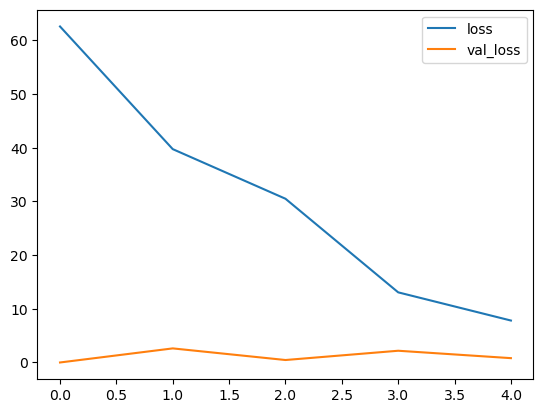

In [38]:
# comparing the training and validation loss.
metrics_df[["loss","val_loss"]].plot()

<Axes: >

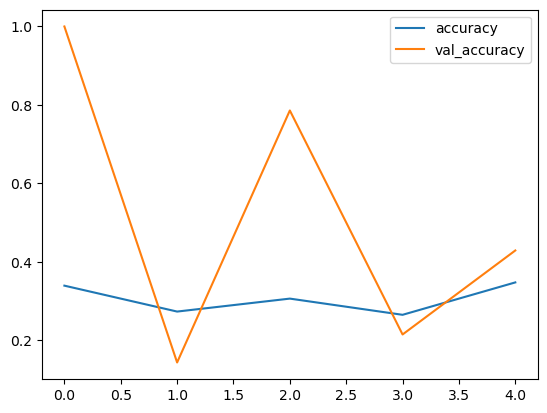

In [40]:
# comparing the training and validation accuracy.
metrics_df[["accuracy","val_accuracy"]].plot()

## Model Evaluation

In [ ]:
val_loss, val_accuracy = hybrid_model1.evaluate(X_val, y_val)
print('Accuracy on validation dataset:', val_accuracy)
print('Loss on validation dataset:', val_loss)

1/1 [==============================] - 24s 24s/step - loss: 17.1240 - accuracy: 0.5000
Accuracy on validation dataset: 0.5
Loss on validation dataset: 17.123992919921875


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Accuracy on test dataset:', val_accuracy)
print('Loss on test dataset:', val_loss)